In [54]:
import numpy as np
import time
import os
import matplotlib.pyplot as plt 
from Queue import PriorityQueue
import planners
reload(planners)

<module 'planners' from 'c:\Users\herbi\Documents\Spring 2022\6141\racecar_docker\home\racecar_ws\src\path_planning\src\planners.pyc'>

In [69]:
occupancy_grid_ex_1 = np.reshape(np.array([
    [0,0,0,0,0,1,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0],
    [0,0,1,0,0,1,0,0,0,0],
    [0,0,1,0,0,1,0,0,0,0],
    [0,0,1,0,0,1,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,1,0,0],
    [0,0,1,0,0,0,0,1,0,0]
    ]).flatten('A'), (10,10))
occupancy_grid_ex_2 = np.reshape(np.array([
    [0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0],
    [0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0],
    [0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0],
    [0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0],
    [0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0],
    [0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0],
    [0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0],
    [0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0],
    ]).flatten('A'), (25,25))

In [70]:
def plan_path(map,planner, start, goal, visualize=True):
    planner = planner(map,map.shape[0],map.shape[1],1)
    path = planner.find_path(start, goal)
    if visualize:
        plt.figure()
        map[start] = 2
        map[goal] = 3
        plt.imshow(map)
        plt.figure()
        for point in path:
            point = (int(point[1]),int(point[0]))
            if map[point] == 0:
                map[point] = 4
            else:
                map[point] = 5
        plt.imshow(map)
        plt.show()
    return path



Found goal state!


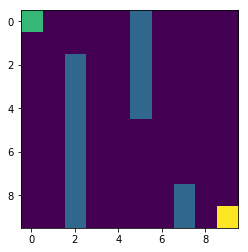

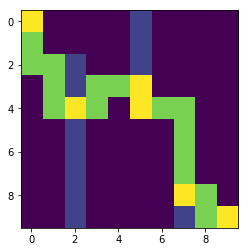

Break!


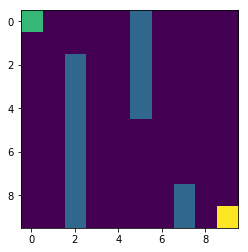

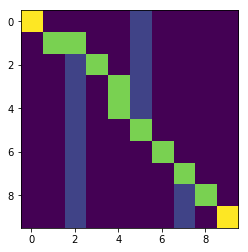

Found goal state!


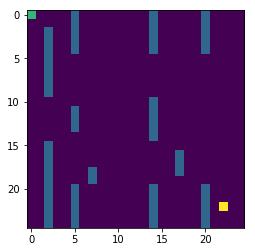

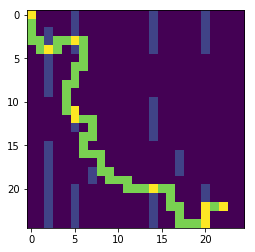

Found goal state!


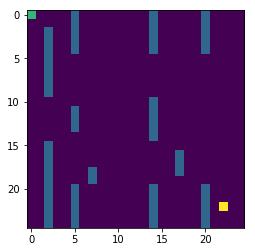

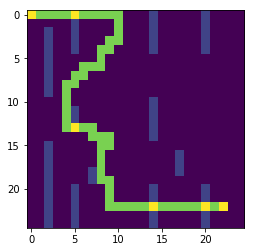

[[22, 22],
 [22, 22],
 [21.0, 22.0],
 [20.0, 22.0],
 [19.0, 22.0],
 [18.0, 22.0],
 [17.0, 22.0],
 [16.0, 22.0],
 [15.0, 22.0],
 [14.0, 22.0],
 [13.0, 22.0],
 [12.0, 22.0],
 [11.0, 22.0],
 [10.0, 22.0],
 [9.0, 22.0],
 [9.0, 21.0],
 [9.0, 20.0],
 [9.0, 19.0],
 [8.0, 19.0],
 [8.0, 18.0],
 [8.0, 17.0],
 [8.0, 16.0],
 [8.0, 15.0],
 [9.0, 15.0],
 [9.0, 14.0],
 [8.0, 14.0],
 [7.0, 14.0],
 [7.0, 13.0],
 [6.0, 13.0],
 [5.0, 13.0],
 [4.0, 13.0],
 [4.0, 12.0],
 [4.0, 11.0],
 [4.0, 10.0],
 [4.0, 9.0],
 [4.0, 8.0],
 [5.0, 8.0],
 [5.0, 7.0],
 [6.0, 7.0],
 [6.0, 6.0],
 [7.0, 6.0],
 [8.0, 6.0],
 [8.0, 5.0],
 [8.0, 4.0],
 [9.0, 4.0],
 [9.0, 3.0],
 [10.0, 3.0],
 [10.0, 2.0],
 [10.0, 1.0],
 [10.0, 0.0],
 [9.0, 0.0],
 [8.0, 0.0],
 [7.0, 0.0],
 [6.0, 0.0],
 [5.0, 0.0],
 [4.0, 0.0],
 [3.0, 0.0],
 [2.0, 0.0],
 [1.0, 0.0],
 [0, 0]]

In [71]:
nodes = plan_path(occupancy_grid_ex_1.copy(),planners.RRTPlanner, (0,0), (9,9), visualize=True)
nodes = plan_path(occupancy_grid_ex_1.copy(),planners.AStarPlanner, (0,0), (9,9), visualize=True)
nodes = plan_path(occupancy_grid_ex_2.copy(),planners.RRTPlanner, (0,0), (22,22), visualize=True)
# plt.scatter([node.x for node in nodes],[node.y for node in nodes])
plan_path(occupancy_grid_ex_2.copy(),planners.RRTPlanner, (0,0), (22,22))

In [73]:
import timeit 
import pandas as pd
test_paths = {'test1':[(51,978),(603,991)],
'test2':[(73,989),(1116,973)],
'test3':[(596,989),(899,855)],
'test4':[(762,972),(985,284)],
'test5':[(876, 982), (1590, 295)]
}
algorithms = {'RRT':planners.RRTPlanner,'AStar':planners.AStarPlanner}
time_df = pd.DataFrame(columns=['algorithm','test1','test2','test3','test4','test5'])
dist_df = pd.DataFrame(columns=['algorithm','test1','test2','test3','test4','test5']) 

In [74]:
for alg in algorithms:
    planner = algorithms[alg](map,map.shape[0],map.shape[1],1)
    avg_dists = []
    time_dists = []
    for test in test_paths:
        start = test_paths[test][0]
        goal = test_paths[test][1]
        avg_dist = 0
        for i in range(5):
            path = planner.find_path(start, goal)
            avg_dist += sum([np.sqrt((path[i][0]-path[i+1][0])**2+(path[i][1]-path[i+1][1])**2) for i in range(len(path)-1)])
        avg_dists.append(avg_dist/5)
        time_dists.append(timeit.timeit(lambda:planner.find_path(start, goal),number=5)/5)
    time_df.append({'algorithm':alg,'test1':time_dists[0],'test2':time_dists[1],'test3':time_dists[2],'test4':time_dists[3],'test5':time_dists[4]},ignore_index=True)
    dist_df.append({'algorithm':alg,'test1':avg_dists[0],'test2':avg_dists[1],'test3':avg_dists[2],'test4':avg_dists[3],'test5':avg_dists[4]},ignore_index=True)

Error: Canceled future for execute_request message before replies were done

In [ ]:
dist_df 
time_df